In [ ]:
# 100 boxes, 100 prisoners. Each prisoner can search 50 boxes but need to find the specific number slip allocated
# without communicating to each other.

In [2]:
using Random

In [3]:
shuffle(1:5)

5-element Vector{Int64}:
 1
 3
 4
 5
 2

In [145]:
m = 10 #no. prisoners/boxes = 2*m
slip = 1:2*m
#randomise the slip arrangement

r_slip = shuffle(slip)
print([1:2*m r_slip])

[1 6; 2 18; 3 14; 4 1; 5 8; 6 4; 7 16; 8 17; 9 9; 10 15; 11 2; 12 19; 13 10; 14 5; 15 20; 16 12; 17 11; 18 13; 19 3; 20 7]

In [148]:
#let i be the number allocated to the prisoner. They will check each indice first.

success = zeros(2*m,1)
ndices = []


loops = Set([])

for i ∈ 1:2*m
    #println("finding slip ",i, " check box ", i, " first.")
    checked = [i]
    
    count = 0
    j = i
    while count < 2*m
        if r_slip[j] == i
            if count < m
                success[i] = 1
                print("yes ")
            end
            #println("box ",j," yes!, found slip ",r_slip[j])
            
            append!(ndices,j)
            println(checked)
            
            
            
            test = 0
            for n ∈ loops   
                
                if sort(n) == sort(checked)
                    test += 1
                end
            end

            if test == 0
                push!(loops,checked)
            end
            
            break
        else
            count += 1
            #print("box ", j)
            j = r_slip[j]
            #println(", found slip ",j)
            append!(checked,j)
            
            if count == m
                println(checked, " no")
                
                
            end
            
            
            
            
            
            
        end
    end
    println()
end

println(loops)
println(length(loops))
    
l_of_loops = []
for o ∈ loops
    append!(l_of_loops,length(o))
end
println(last(sort(l_of_loops)))

yes [1, 6, 4]

[2, 18, 13, 10, 15, 20, 7, 16, 12, 19, 3] no
[2, 18, 13, 10, 15, 20, 7, 16, 12, 19, 3, 14, 5, 8, 17, 11]

[3, 14, 5, 8, 17, 11, 2, 18, 13, 10, 15] no
[3, 14, 5, 8, 17, 11, 2, 18, 13, 10, 15, 20, 7, 16, 12, 19]

yes [4, 1, 6]

[5, 8, 17, 11, 2, 18, 13, 10, 15, 20, 7] no
[5, 8, 17, 11, 2, 18, 13, 10, 15, 20, 7, 16, 12, 19, 3, 14]

yes [6, 4, 1]

[7, 16, 12, 19, 3, 14, 5, 8, 17, 11, 2] no
[7, 16, 12, 19, 3, 14, 5, 8, 17, 11, 2, 18, 13, 10, 15, 20]

[8, 17, 11, 2, 18, 13, 10, 15, 20, 7, 16] no
[8, 17, 11, 2, 18, 13, 10, 15, 20, 7, 16, 12, 19, 3, 14, 5]

yes [9]

[10, 15, 20, 7, 16, 12, 19, 3, 14, 5, 8] no
[10, 15, 20, 7, 16, 12, 19, 3, 14, 5, 8, 17, 11, 2, 18, 13]

[11, 2, 18, 13, 10, 15, 20, 7, 16, 12, 19] no
[11, 2, 18, 13, 10, 15, 20, 7, 16, 12, 19, 3, 14, 5, 8, 17]

[12, 19, 3, 14, 5, 8, 17, 11, 2, 18, 13] no
[12, 19, 3, 14, 5, 8, 17, 11, 2, 18, 13, 10, 15, 20, 7, 16]

[13, 10, 15, 20, 7, 16, 12, 19, 3, 14, 5] no
[13, 10, 15, 20, 7, 16, 12, 19, 3, 14, 5, 8, 17, 11, 2, 18

In [149]:
sum(success)

4.0

In [150]:
ndices

20-element Vector{Any}:
  4
 11
 19
  6
 14
  1
 20
  5
  9
 13
 17
 16
 18
  3
 10
  7
  8
  2
 12
 15

In [151]:
truth = 0
for i ∈ 1:2*m
    if r_slip[ndices[i]] == i
        truth += 1
    end
end

In [152]:
truth

20

In [215]:
m = 50 #number of attempts
#no. prisoners/boxes = 2*m
slip = 1:2*m
n_loops = []
l_loops = []
successful = []

iter = 100000

for p ∈ 1:iter

    #randomise the slip arrangement

    r_slip = shuffle(slip)




    #let i be the number allocated to the prisoner. They will check each indice first.

    success = zeros(2*m,1)
    ndices = []


    loops = Set([])

    for i ∈ 1:2*m
        checked = [i]

        count = 0
        j = i
        while count < 2*m
            if r_slip[j] == i
                if count < m
                    success[i] = 1
                end

                append!(ndices,j)

                test = 0
                for n ∈ loops   

                    if sort(n) == sort(checked)
                        test += 1
                    end
                end

                if test == 0
                    push!(loops,checked)
                end

                break
            else
                count += 1
                j = r_slip[j]
                append!(checked,j)            

            end
        end
    end

    #println(loops)
    append!(n_loops,length(loops))

    l_of_loops = []
    for o ∈ loops
        append!(l_of_loops,length(o))
    end
    append!(l_loops,last(sort(l_of_loops)))
    
    if sum(success) == 2*m
        append!(successful,1)
    else
        append!(successful,0)
    end
        
end
    
# println()
# println(n_loops)
# println(l_loops)    
# println(successful)

In [174]:
using Statistics

In [216]:
μₙ = mean(n_loops)
μₗ = mean(l_loops)
s_rate = sum(successful)/length(successful)
println()

In [188]:
using Plots

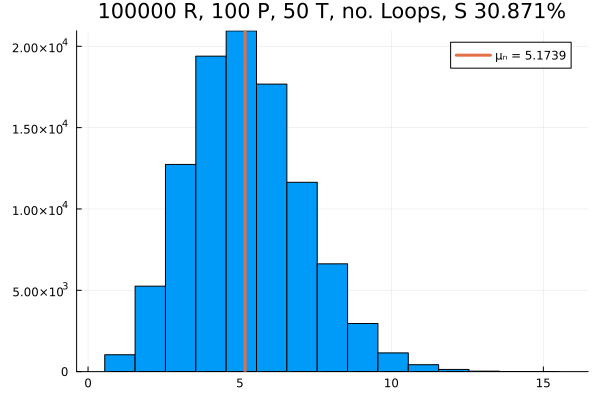

In [219]:
histogram(n_loops,label = "",bar_width = 1)
title!(string(iter)*" R, "*string(2*m)*" P, "*string(m)* " T, no. Loops, S "*string(s_rate*100)*"%")
vline!([μₙ],legend = true, label = "μₙ = "*string(μₙ),linewidth = 3)

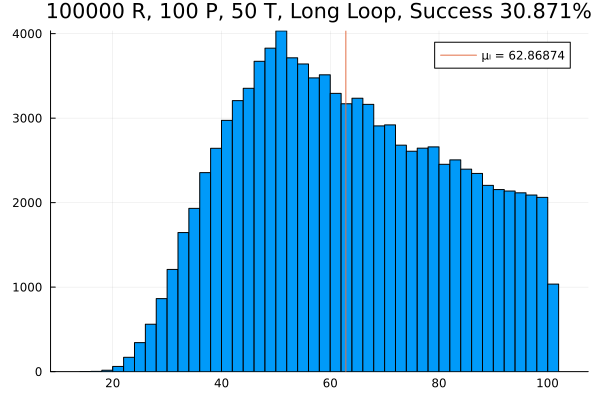

In [220]:
histogram(l_loops,label = "")
title!(string(iter)*" R, "*string(2*m)*" P, "*string(m)* " T, Long Loop, Success "*string(s_rate*100)*"%")
vline!([μₗ],legend = true, label = "μₗ = "*string(μₗ))

In [ ]:
using Statistics

In [383]:
a = 50
mn = 1:a #number of attempts
#no. prisoners/boxes = 2*m


an_n_loops = []
an_l_loops = []
success_rates = []

for m ∈ mn

    slip = 1:2*m
    n_loops = []
    l_loops = []
    successful = []

    iter = 10000

    for p ∈ 1:iter

        #randomise the slip arrangement

        r_slip = shuffle(slip)




        #let i be the number allocated to the prisoner. They will check each indice first.

        success = zeros(2*m,1)
        ndices = []


        loops = Set([])

        for i ∈ 1:2*m
            checked = [i]

            count = 0
            j = i
            while count < 2*m
                if r_slip[j] == i
                    if count < m
                        success[i] = 1
                    end

                    append!(ndices,j)

                    test = 0
                    for n ∈ loops   

                        if sort(n) == sort(checked)
                            test += 1
                        end
                    end

                    if test == 0
                        push!(loops,checked)
                    end

                    break
                else
                    count += 1
                    j = r_slip[j]
                    append!(checked,j)            

                end
            end
        end

        #println(loops)
        append!(n_loops,length(loops))

        l_of_loops = []
        for o ∈ loops
            append!(l_of_loops,length(o))
        end
        append!(l_loops,last(sort(l_of_loops)))

        if sum(success) == 2*m
            append!(successful,1)
        else
            append!(successful,0)
        end

    end
    append!(an_n_loops ,mean(n_loops) )
    append!(an_l_loops ,mean(l_loops) )
    append!(success_rates ,sum(successful)/length(successful))
        
end

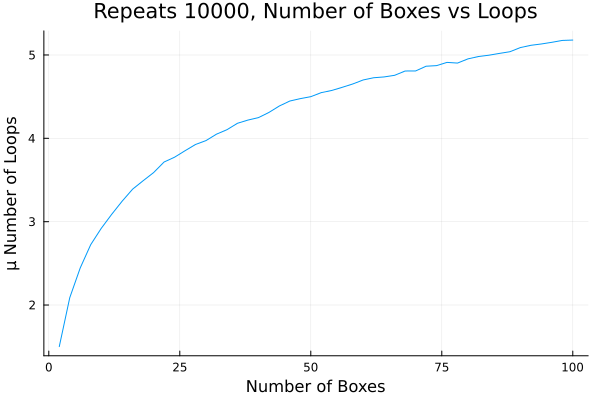

In [385]:
plot(2*mn, an_n_loops,legend = false)
title!("Repeats "*string(iter)* ", Number of Boxes vs Loops" )
xlabel!("Number of Boxes")
ylabel!("μ Number of Loops")

In [388]:
grad = (last(an_l_loops) - first(an_l_loops))/(last(2*mn) - first(2*mn) ) 

0.6263663265306123

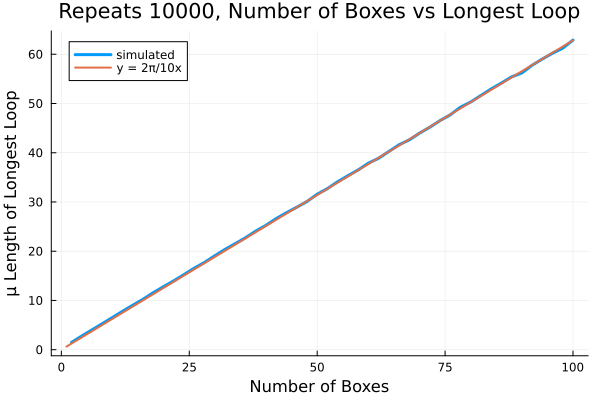

In [398]:
plot(2*mn, an_l_loops,legend = true, label = "simulated",linewidth = 3)
plot!(line, 2*pi/10*line,label = "y = 2π/10x",linewidth = 2)
title!("Repeats "*string(iter)* ", Number of Boxes vs Longest Loop" )
xlabel!("Number of Boxes")
ylabel!("μ Length of Longest Loop")

In [403]:
Σ = sum(1 ./ (51:100))

0.6881721793101951

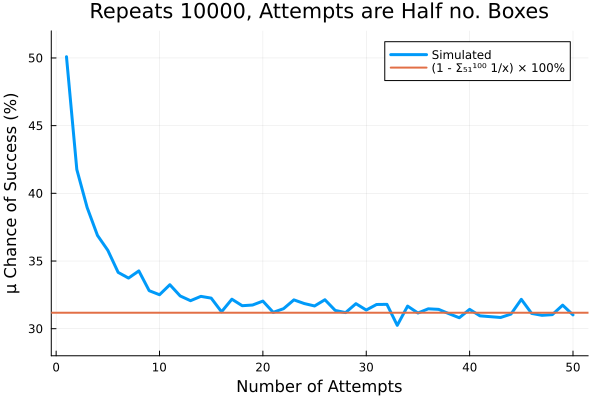

In [408]:
plot(mn, success_rates*100,ylims = (28,52),label = "Simulated",linewidth = 3)
title!("Repeats "*string(iter)* ", Attempts are Half no. Boxes" )
xlabel!("Number of Attempts")
ylabel!("μ Chance of Success (%)")
hline!([100-Σ*100],label = "(1 - Σ₅₁¹⁰⁰ 1/x) × 100%", linewidth = 2)

In [371]:
#no. prisoners/boxes = 100
non = 100 #no. boxes/prisoners
slip = 1:non

success_rates = []


iter = 10000

for m ∈ 1:non

    
    successful = []

    for p ∈ 1:iter
        

        #randomise the slip arrangement

        r_slip = shuffle(slip)


        #let i be the number allocated to the prisoner. They will check each indice first.

        success = zeros(non,1)

        for i ∈ 1:non

            count = 0
            j = i
            while count < non
                if r_slip[j] == i
                    if count < m
                        success[i] = 1
                    end


                    break
                else
                    count += 1
                    j = r_slip[j]

                end
            end
        end

        if sum(success) == non
            append!(successful,1)
        else
            append!(successful,0)
        end
        

    end
        
    append!(success_rates ,sum(successful)/length(successful))
   
end
    


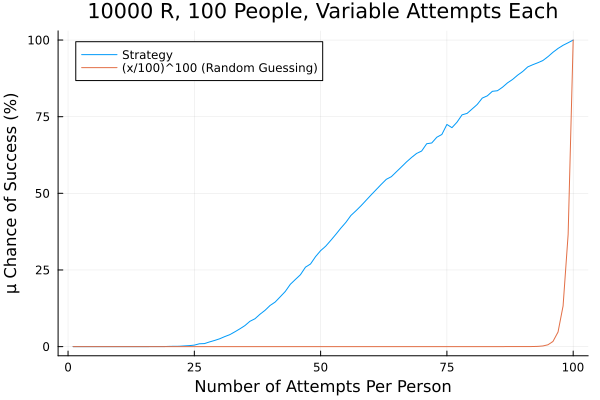

In [378]:
plot(1:non,100*success_rates,legend = true,label = "Strategy")
plot!(1:non, 100*((1:non) / non ).^non ,label = "(x/"*string(non)*")^"*string(non)*" (Random Guessing)")
title!(string(iter)*" R, "*string(non)*" People, Variable Attempts Each")
xlabel!("Number of Attempts Per Person")
ylabel!("μ Chance of Success (%)")

In [380]:
#no. prisoners/boxes = 100
non = 10 #no. boxes/prisoners
slip = 1:non

success_rates = []


iter = 1000

for m ∈ 1:non-1

    
    successful = []

    for p ∈ 1:iter
        

        #randomise the slip arrangement

        r_slip = shuffle(slip)
        #println(r_slip)


        #let i be the number allocated to the prisoner. They will check each indice first.

        success = zeros(non,1)

        for i ∈ 1:non
            existing = Set(1:non)
            count = 0
            j = rand(existing)
            delete!(existing,j)
            while count < non
                if r_slip[j] == i
                    #println(j, " yes ", r_slip[j])
                    if count < m
                        success[i] = 1
                    end


                    break
                else
                    #println(j, " no ", r_slip[j])
                    count += 1
                    j = rand(existing)
                    delete!(existing,j)

                end
            end
            #println()
        end

        if sum(success) == non
            append!(successful,1)
        else
            append!(successful,0)
        end
        

    end
        
    append!(success_rates ,sum(successful)/length(successful))
   
end

#println()

In [381]:
print(success_rates)

Any[0.0, 0.0, 0.0, 0.0, 0.004, 0.009, 0.027, 0.115, 0.361]

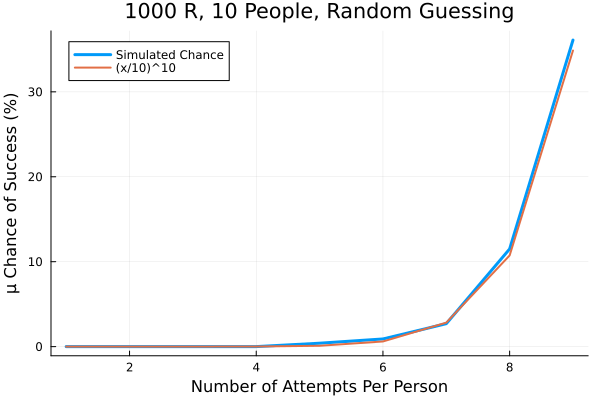

In [382]:
plot(1:non-1,100*success_rates,legend = true,linewidth = 3, label = "Simulated Chance")
plot!(1:non-1, 100*((1:non-1) / non ).^non ,linewidth = 2,label = "(x/"*string(non)*")^"*string(non))
title!(string(iter)*" R, "*string(non)*" People, Random Guessing")
xlabel!("Number of Attempts Per Person")
ylabel!("μ Chance of Success (%)")